In [89]:
import pandas as pd

data = pd.read_csv("../../Module1/0-Data/Admission_Predict_Ver1.1.csv")
data.drop("Serial No.", axis=1, inplace=True)

x = data.drop("Chance of Admit ", axis=1)
y = data["Chance of Admit "]

x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

normalizer = MinMaxScaler(feature_range=(0, 1))
x_norm = normalizer.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(
    x_norm, y, test_size=0.3, shuffle=True
)

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(keras.Input((x_norm.shape[1],)))
model.add(Dense(8, kernel_initializer="normal", activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer="normal", activation="linear"))

In [92]:
from keras.optimizers import Adam

optimizer = Adam()
model.compile(
    loss="mean_squared_error", optimizer=optimizer, metrics=["mean_squared_error"]
)

In [93]:
print(x_train.shape)
historic = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=50,
    validation_data=(x_test, y_test),
    verbose=1,
)

(350, 7)
Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5552 - mean_squared_error: 0.5552 - val_loss: 0.5282 - val_mean_squared_error: 0.5282
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5412 - mean_squared_error: 0.5412 - val_loss: 0.5087 - val_mean_squared_error: 0.5087
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5127 - mean_squared_error: 0.5127 - val_loss: 0.4885 - val_mean_squared_error: 0.4885
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4931 - mean_squared_error: 0.4931 - val_loss: 0.4664 - val_mean_squared_error: 0.4664
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4770 - mean_squared_error: 0.4770 - val_loss: 0.4420 - val_mean_squared_error: 0.4420
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4485 - mean_squared_error: 0.4485 - val_loss: 0.4150 - val_mean_squared_error: 0.4150
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4196 - mean_squared_error: 0.4196 - val_loss: 0.3855 - val_me

In [94]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 8)              │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 221 (888.00 B)

 Trainable params: 73 (292.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148 (596.00 B)

{'loss': [0.5529274940490723, 0.5321974158287048, 0.5119337439537048, 0.48999154567718506, 0.467428594827652, 0.4401884973049164, 0.4123181998729706, 0.37982678413391113, 0.34824249148368835, 0.3127426207065582, 0.2785499691963196, 0.24029968678951263, 0.20598427951335907, 0.17501190304756165, 0.14807477593421936, 0.1254555732011795, 0.09740952402353287, 0.0860348492860794, 0.06597041338682175, 0.051855526864528656, 0.051829006522893906, 0.03820984810590744, 0.038614388555288315, 0.04455942288041115, 0.03910414129495621, 0.04397844895720482, 0.038764361292123795, 0.03730229660868645, 0.037921465933322906, 0.036944836378097534, 0.032605063170194626, 0.036204803735017776, 0.03606375679373741, 0.036346327513456345, 0.03751394897699356, 0.03603007271885872, 0.03243357688188553, 0.03488994389772415, 0.03684084117412567, 0.03330738842487335, 0.036537326872348785, 0.030402090400457382, 0.03533149138092995, 0.03377164155244827, 0.03811532258987427, 0.03378945589065552, 0.034304965287446976, 0.

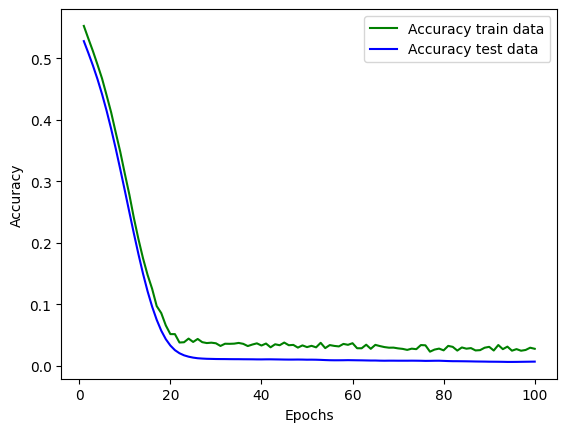

In [95]:
import matplotlib.pyplot as plt

print(historic.history)

accuracy_train = historic.history["loss"]
accuracy_test = historic.history["val_loss"]
epochs = range(1, len(accuracy_train) + 1)

plt.plot(epochs, accuracy_train, "-g", label="Accuracy train data")
plt.plot(epochs, accuracy_test, "-b", label="Accuracy test data")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()